# Database and statistical model

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Loading data
data_matriA, COP_train, data_matrix_test, COP_test, names = np.load('data_center_data_matrix.npy', allow_pickle=True)

# Constructing matrices for min_w ||A w - b||_2**2

matrix_mean = np.mean(data_matriA, axis=0)
M = data_matriA - matrix_mean
matrix_std = np.std(M, axis=0)
M = M / matrix_std

A = np.hstack([M, np.ones((M.shape[0],1)), -(M.T * COP_train[:,3]).T])
b = COP_train[:,3]

# Constructing matrices for the test set

M_test = (data_matrix_test - matrix_mean) / matrix_std
A_test = np.hstack([M_test, np.ones((M_test.shape[0],1)), -(M_test.T * COP_test[:,3]).T])
b_test = COP_test[:,3]

In [82]:
# Loading raw data
import pandas as pd
data = pd.read_csv('Raw_Dataset_May.csv')

def name_to_subcategory_and_details(col_name):
    if np.isreal(col_name):
        col_name = names[col_name]
    indices = np.nonzero((data['NAME'] == col_name).values)[0]
    if len(indices) > 0:
        subcategory = data['SUBCATEGORY'].iloc[[indices[0]]].values[0]
        details = data['DETAILS'].iloc[[indices[0]]].values[0]
        return subcategory, details
    else:
        print('unknown name')

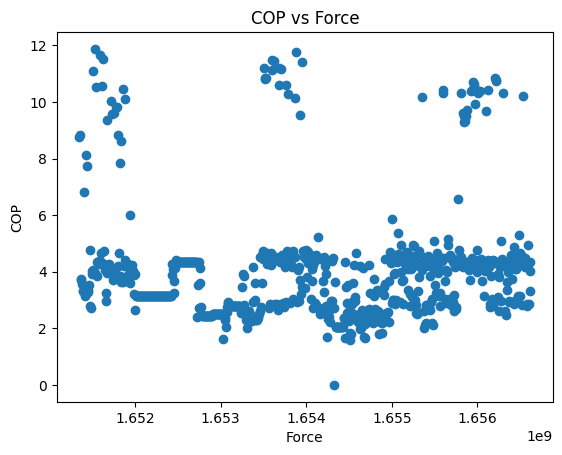

In [83]:
# Plotting some data to know what we are dealing with
plt.figure()
plt.plot(data_matriA[:,0], COP_train[:,3], 'o')
plt.ylabel('COP')
plt.xlabel('Force')
plt.title('COP vs Force')
plt.show()


# Least square

## Question 3.1

Show that if $A\omega = b$, then $y(t) = \frac{w_1^T \hat{x}(t) + w_0}{w_2^T \hat{x}(t) + 1}$



The model for the KPI number $ i $ at time $ t $ is given by:

$$ y_i(t) = \frac{w_{1,i}^\top \hat{x}(t) + w_{0,i} + \epsilon_i(t)}{w_{2,i}^\top \hat{x}(t) + 1} $$

From this, we can see that $ w_{1,i} $, $ w_{0,i} $, and $ w_{2,i} $ are the parameters of the model, and $ \epsilon_i(t) $ represents some i.i.d. noise. Now, since we are focusing on KPI number 3, we can simplify the notation by dropping the index $ i $ and referring to the parameters as $ w_0 $, $ w_1 $, and $ w_2 $.

Now, the statement we are trying to prove is that if $ Aw = b $, then $ y(t) $ can be expressed in a certain way. Given the model provided, if we ignore the noise term $ \epsilon_i(t) $, which is reasonable if we're considering an ideal scenario without noise, we can rewrite the model for $ y(t) $ without the noise term as:

$$ y(t) = \frac{w_1^\top \hat{x}(t) + w_0}{w_2^\top \hat{x}(t) + 1} $$

This is exactly the expression we are asked to show as a result of $ Aw = b $.

Now let's consider the equation $ Aw = b $. Given the context, $ A $ represents the design matrix that includes the standardized measurements $ \hat{x}(t) $, and $ w $ represents the parameters $ w_0 $, $ w_1 $ and $ w_2 $. 

In the equation $ Aw = b $, $ b $ represents the observed values of the KPI, which correspond to the function $ y(t) $ without the noise term. If the model has been fit well to the data, this equation would hold for the values of $ w $ that minimize the least squares error.

Given this, if we have that $ Aw = b $, it means that the model's prediction fits the observed data perfectly (in the absence of noise). This would imply that for each $ t $, the model prediction is exactly the observed KPI value, hence:

$$ y(t) = \frac{w_1^\top \hat{x}(t) + w_0}{w_2^\top \hat{x}(t) + 1} $$

So, $ Aw = b $ implies the formula for $ y(t) $ as given, assuming that the noise $ \epsilon_i(t) $ is zero or negligible, and that $ w $ contains the parameters that minimize the least squares error. 

## Question 3.2

Solve this least squares problem using the function ``numpy.linalg.lstsq``

In [84]:
# Solving the least squares problem. Parameters : A (matrix with the data), b (vector with the COP), rcond=None (default)
x, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

# Printing the results
print('Solution:', x)
print('Residuals:', residuals)
print('Rank:', rank)
print('Singular Values:', singular_values)

Solution: [-0.00927821  0.08309371 -0.03672704 ...  0.01980595 -0.03057174
 -0.01188614]
Residuals: []
Rank: 722
Singular Values: [1.86883469e+03 1.30755729e+03 1.06495990e+03 8.94966815e+02
 7.07094525e+02 6.65682171e+02 5.85360190e+02 5.45184089e+02
 4.84441218e+02 4.49975046e+02 4.37580490e+02 4.08165317e+02
 3.81772991e+02 3.66524488e+02 3.56883973e+02 3.47223035e+02
 3.30885211e+02 3.23121211e+02 3.16349135e+02 3.06966610e+02
 2.89155903e+02 2.72389709e+02 2.66829717e+02 2.60468790e+02
 2.53890826e+02 2.46804651e+02 2.44646144e+02 2.40910255e+02
 2.39689781e+02 2.35004563e+02 2.33203647e+02 2.25445824e+02
 2.20320432e+02 2.19007974e+02 2.16096455e+02 2.13838675e+02
 2.12779385e+02 2.07732313e+02 2.05565222e+02 2.01206410e+02
 1.98474815e+02 1.97092838e+02 1.95178685e+02 1.92607360e+02
 1.89302065e+02 1.87229344e+02 1.86586370e+02 1.84197494e+02
 1.81692789e+02 1.80098680e+02 1.78181510e+02 1.77666143e+02
 1.75447261e+02 1.71102787e+02 1.69449794e+02 1.67471172e+02
 1.67162512e+02 

## Question 3.3

Evaluate the quality of the solution found on the test set.

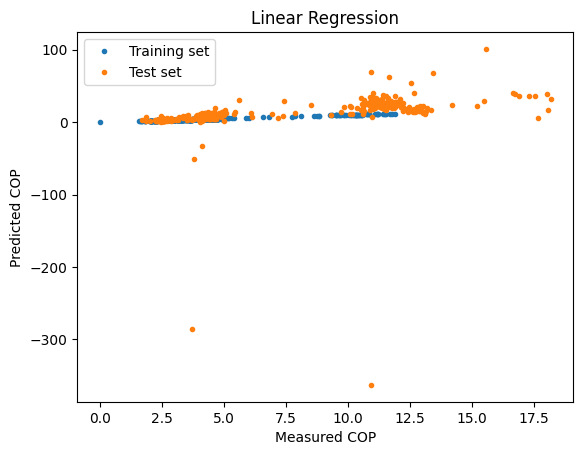

In [85]:
# Plotting the results
plt.figure()
plt.plot(b, A.dot(x), '.')
plt.plot(b_test, A_test.dot(x), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression')
plt.legend(['Training set', 'Test set'])
plt.savefig('Linear_Regression.png', dpi=300)
plt.show()

In [86]:
# Quality of the fit
from sklearn.metrics import r2_score
r2 = r2_score(b_test, A_test.dot(x))
print('R2 score:', r2)

R2 score: -40.875855829067625


## Question 3.4

In order to improve the generalization power of the model, we consider a $\ell_2$ regularization :

$$ \text{min}_w \frac{1}{2} ‖Aw −b‖^2 + \frac{\lambda}{2} ‖w‖^2 $$

where $\lambda = 100$. Solve this problem and compare the test mean square error with the unregularized one.

In [87]:
# Improving the fit using L2 regularization using lambda = 100
lambda_ = 100
x_reg = np.linalg.solve(A.T.dot(A) + lambda_ * np.eye(A.shape[1]), A.T.dot(b))
print('Solution:', x_reg)
print('Residuals:', np.linalg.norm(A.dot(x_reg) - b))
print('Rank:', np.linalg.matrix_rank(A))
print('Singular Values:', np.linalg.svd(A, compute_uv=False))

Solution: [-0.01238313  0.05780406 -0.00127775 ...  0.01590558 -0.03567897
  0.0131232 ]
Residuals: 12.39865022688966
Rank: 722
Singular Values: [1.86883469e+03 1.30755729e+03 1.06495990e+03 8.94966815e+02
 7.07094525e+02 6.65682171e+02 5.85360190e+02 5.45184089e+02
 4.84441218e+02 4.49975046e+02 4.37580490e+02 4.08165317e+02
 3.81772991e+02 3.66524488e+02 3.56883973e+02 3.47223035e+02
 3.30885211e+02 3.23121211e+02 3.16349135e+02 3.06966610e+02
 2.89155903e+02 2.72389709e+02 2.66829717e+02 2.60468790e+02
 2.53890826e+02 2.46804651e+02 2.44646144e+02 2.40910255e+02
 2.39689781e+02 2.35004563e+02 2.33203647e+02 2.25445824e+02
 2.20320432e+02 2.19007974e+02 2.16096455e+02 2.13838675e+02
 2.12779385e+02 2.07732313e+02 2.05565222e+02 2.01206410e+02
 1.98474815e+02 1.97092838e+02 1.95178685e+02 1.92607360e+02
 1.89302065e+02 1.87229344e+02 1.86586370e+02 1.84197494e+02
 1.81692789e+02 1.80098680e+02 1.78181510e+02 1.77666143e+02
 1.75447261e+02 1.71102787e+02 1.69449794e+02 1.67471172e+02
 

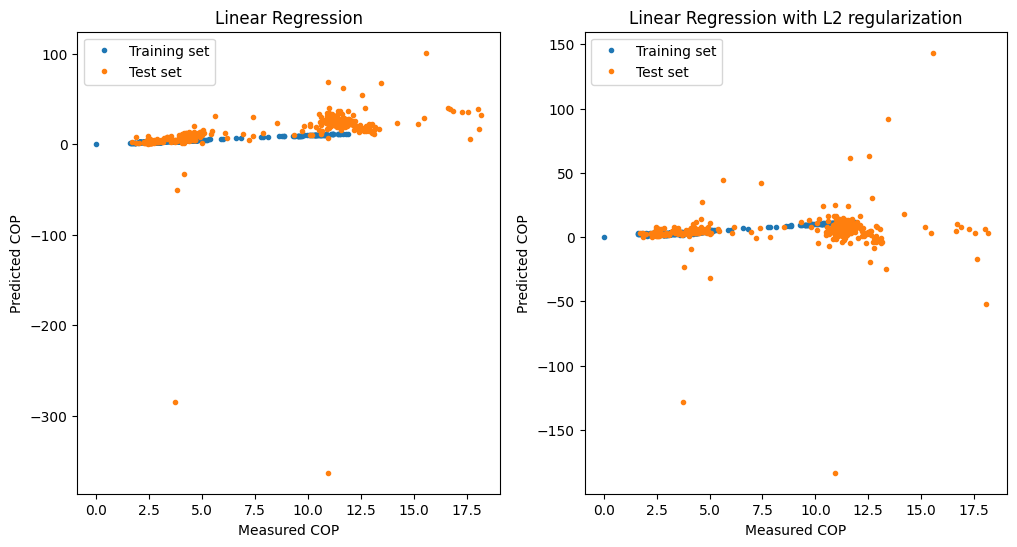

In [88]:
# Plotting the results in a 1x2 grid
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(b, A.dot(x), '.')
plt.plot(b_test, A_test.dot(x), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression')
plt.legend(['Training set', 'Test set'])

plt.subplot(122)
plt.plot(b, A.dot(x_reg), '.')
plt.plot(b_test, A_test.dot(x_reg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression with L2 regularization')
plt.legend(['Training set', 'Test set'])
plt.savefig('Linear_Regression_L2.png', dpi=300)
plt.show()

## Question 3.5

Calculate the gradient of $f_1 : w \rightarrow \frac{1}{2} ||Aw − b||^2 + \frac{\lambda}{2} ||w||^2$ . Is the function convex ?

$$
\begin{align*}
f(w + h) =& \frac{1}{2} || A(w + h) - b ||^2 + \frac{\lambda}{2} || w + h ||^2 \\
 =& \frac{1}{2} || (Aw -b) - Ah ||^2 + \frac{\lambda}{2} \left( || w ||^2 + 2 \langle w, h \rangle + || h ||^2 \right ) \\
 =& \frac{1}{2} \left ( || Aw - b ||^2 + 2 \langle Aw - b, Ah \rangle + || Ah ||^2 \right ) + \frac{\lambda}{2} \left( || w ||^2 + 2 \langle w, h \rangle + || h ||^2 \right ) \\
 =& f(w) + \langle Aw - b, Ah \rangle + \lambda \langle w, h \rangle + \frac{1}{2} || Ah ||^2 + \frac{\lambda}{2} || h ||^2 \\
 =& f(w) + \langle A^T(Aw - b), h \rangle + \lambda \langle w, h \rangle + O(h) \\
 =& f(w) + \langle A^T(Aw - b) + \lambda w, h \rangle + O(h)
\end{align*}
$$

Then $\nabla f(w) = A^T(Aw - b) + \lambda w$

To determine whether the function is convex, we need to look at the properties of the function's terms.

The function $ f_1(\mathbf{w}) $ is composed of two parts:

1. $ \frac{1}{2} \|\mathbf{A}\mathbf{w} - \mathbf{b}\|^2 $: This term represents the squared Euclidean norm (L2 norm) of the vector $ (\mathbf{A}\mathbf{w} - \mathbf{b}) $, which is a convex function. The squared norm is convex because the second derivative (or the Hessian matrix in the case of vectors) is positive semi-definite.

2. $ \frac{\lambda}{2} \|\mathbf{w}\|^2 $: This term is also the squared L2 norm, but scaled by a factor $ \lambda $. Since $ \lambda $ is a positive scalar, it preserves the convexity of the squared norm.

The sum of convex functions is also convex. Therefore, if both terms in $ f_1(\mathbf{w}) $ are convex, which they are, the function $ f_1(\mathbf{w}) $ is convex as well.

Moreover, if $ \mathbf{A} $ is a matrix of real numbers, the function is not only convex but also strictly convex, provided that $ \lambda $ is positive, because the term $ \frac{\lambda}{2} \|\mathbf{w}\|^2 $ adds a positive definite quadratic term to the function, ensuring strict convexity.

## Question 3.6

Implement gradient descent to minimize $f_1$. What step size are you choosing ? How many iterations are needed to get $w_k$ such that $||∇f(wk)||≤1$ ?

A good rate can be obtained by taking $\gamma = \frac{2}{L + \mu}$, knowing that the function is 1-strongly convex.

gamma: 4.703467206086619e-07 L: 4252082.299499949 mu: 100
1 120933.27967322826
2 69693.31708452036
3 45053.884588344066
4 30147.51913509469
5 21087.723075277732
6 15802.276457079908
7 12890.459843772238
8 11357.716855636272
9 10549.292154444689
10 10092.065517877869
11 9798.813619148876
12 9582.539986743122
13 9404.140720354377
14 9246.090576963901
15 9100.370919729554
16 8963.146252896728
17 8832.448345358687
18 8707.167740330831
19 8586.609314443667
20 8470.291783739658
21 8357.853827486799
22 8249.007722987883
23 8143.514812212391
24 8041.171457026682
25 7941.800339960607
26 7845.244688016379
27 7751.364218056688
28 7660.032168819826
29 7571.13305971372
30 7484.560958054906
31 7400.218114149656
32 7318.013869254622
33 7237.863769925064
34 7159.688840929816
35 7083.41498163856
36 7008.9724597147
37 6936.295482345589
38 6865.321829903412
39 6795.992540370681
40 6728.251635432369
41 6662.04588107202
42 6597.324576981113
43 6534.039370220238
44 6472.144089444058
45 6411.594596683495
46 

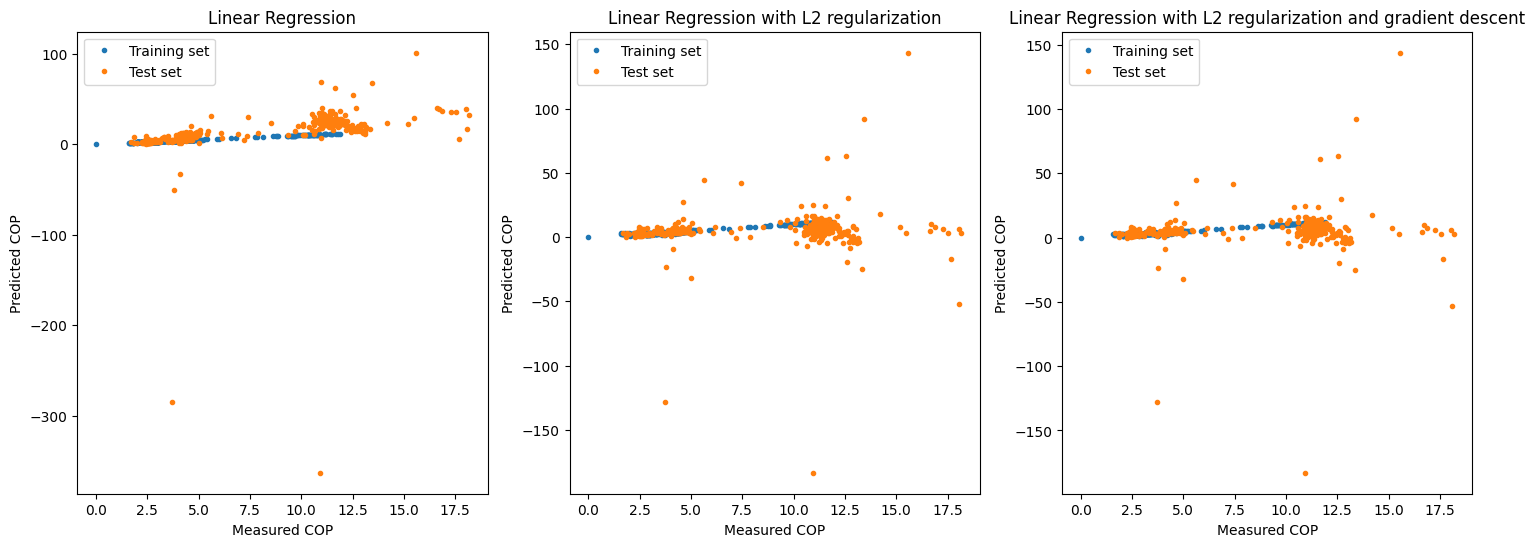

In [89]:
# Running the gradient descent algorithm to solve the least squares problem

# Gradient definition
grad_fx = A.T.dot(A.dot(x) - b) + lambda_*x

# Gradient descent parameters  ---------------------------------------------
# Step size gamma (Strongly convex)
a = 2

# Lipschitz constant of the gradient of f 
L = np.linalg.norm(A.T @ A)
mu = lambda_
gamma = a / (L + mu)
print('gamma:', gamma, 'L:', L, 'mu:', mu)

# Initial point
x0 = np.zeros(A.shape[1])

# Gradient descent algorithm until threshold is reached ---------------------
threshold = 1
x_gd = x0
steps = 0

while np.linalg.norm(grad_fx, ord=2) > threshold:
    x_gd = x_gd - gamma * grad_fx
    grad_fx = A.T.dot(A.dot(x_gd) - b) + lambda_*x_gd
    steps += 1
    print(steps, np.linalg.norm(grad_fx, ord=2))

# Plotting the results in a 1x3 grid
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.plot(b, A.dot(x), '.')
plt.plot(b_test, A_test.dot(x), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression')
plt.legend(['Training set', 'Test set'])

plt.subplot(132)
plt.plot(b, A.dot(x_reg), '.')
plt.plot(b_test, A_test.dot(x_reg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression with L2 regularization')
plt.legend(['Training set', 'Test set'])

if steps > 0:
    plt.subplot(133)
    plt.plot(b, A.dot(x_gd), '.')
    plt.plot(b_test, A_test.dot(x_gd), '.')
    plt.xlabel('Measured COP')
    plt.ylabel('Predicted COP')
    plt.title('Linear Regression with L2 regularization and gradient descent')
    plt.legend(['Training set', 'Test set'])
plt.show()

It required 59383 iterations to get $ || \nabla f(w_k) || \leq 1$.


## Question 3.7

Implement the conjugate gradient method. Compare the convergence rate with the previous algorithm.

1 34393.18991256236
2 14164.505370723058
3 20354.968122881855
4 19269.123030496263
5 15191.720987607512
6 9539.18912196645
7 8847.776438841012
8 8064.288055152618
9 8617.39096962425
10 5408.030227988819
11 5880.372345879523
12 5378.424005097362
13 4482.660636882172
14 6921.9207525741185
15 3280.326346918405
16 3385.2430510265194
17 2651.5260233184026
18 2772.016880264448
19 7056.624358114497
20 2526.5119476622167
21 2169.6800272348005
22 2151.191109493224
23 4789.265125909634
24 1730.1031795318943
25 5872.559939010138
26 2103.8375390650385
27 1694.3018080758764
28 3094.3570060224392
29 1609.8999326942844
30 1272.4343774674317
31 1261.6436397474533
32 1052.9796587416126
33 1908.9888486424272
34 1314.1831578227445
35 1265.0335703052772
36 1814.3989458311207
37 1673.2399414068977
38 996.5767156968008
39 1017.9905513992023
40 792.72543153443
41 1798.9896908502515
42 692.1162598786485
43 660.1922472457223
44 745.4578117478313
45 675.4157379258644
46 553.8639608067571
47 1589.0316627682141
4

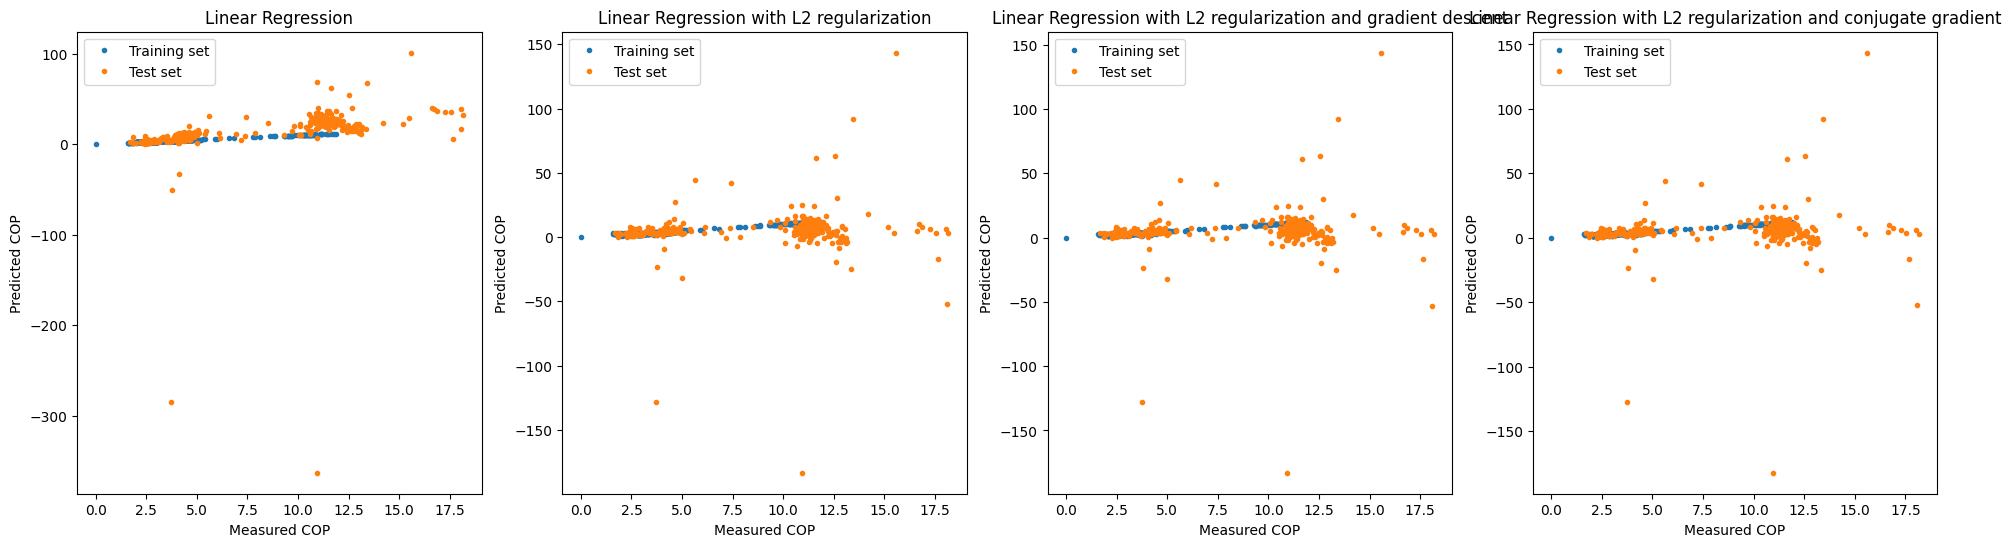

In [90]:
# Conjugate gradient algorithm 

# Initial point
x0 = np.zeros(A.shape[1])

# Conjugate gradient algorithm until threshold is reached ---------------------
threshold = 1
x_cg = x0
steps = 0
r = A.T.dot(A.dot(x_cg) - b) + lambda_*x_cg
p = -r
r_norm = np.linalg.norm(r, ord=2)
r_norm_old = r_norm

while r_norm > threshold:
    Ap = A.T.dot(A.dot(p)) + lambda_*p
    alpha = r_norm**2 / (p.T.dot(Ap))
    x_cg = x_cg + alpha * p
    r = r + alpha * Ap
    r_norm_old = r_norm
    r_norm = np.linalg.norm(r, ord=2)
    beta = r_norm**2 / r_norm_old**2
    p = -r + beta * p
    steps += 1
    print(steps, r_norm)

# Plotting the results in a 1x4 grid
plt.figure(figsize=(24,6))
plt.subplot(141)
plt.plot(b, A.dot(x), '.')
plt.plot(b_test, A_test.dot(x), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression')
plt.legend(['Training set', 'Test set'])

plt.subplot(142)
plt.plot(b, A.dot(x_reg), '.')
plt.plot(b_test, A_test.dot(x_reg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression with L2 regularization')
plt.legend(['Training set', 'Test set'])

if steps > 0:
    plt.subplot(143)
    plt.plot(b, A.dot(x_gd), '.')
    plt.plot(b_test, A_test.dot(x_gd), '.')
    plt.xlabel('Measured COP')
    plt.ylabel('Predicted COP')
    plt.title('Linear Regression with L2 regularization and gradient descent')
    plt.legend(['Training set', 'Test set'])

    plt.subplot(144)
    plt.plot(b, A.dot(x_cg), '.')
    plt.plot(b_test, A_test.dot(x_cg), '.')
    plt.xlabel('Measured COP')
    plt.ylabel('Predicted COP')
    plt.title('Linear Regression with L2 regularization and conjugate gradient')
    plt.legend(['Training set', 'Test set'])

plt.show()

It required 188 iterations to get $ || \nabla f(w_k) || \leq 1$ for the conjugate gradient method. Less than 0.5% of iterations that the gradient method needed. 

# 4 Regularization for a sparse model

You may have seen that at the optimum, the parameter w has many coordinates with small but nonzero values. In order to force most of them to be exactly 0 and thus, to concentrate on the really informative features, we can solve a Lasso problem, that is a least squares problem with $\ell_1$ regularization:

$$
\text{min}_w \frac{1}{2} || Aw - b ||^2 + \lambda || w ||_1
$$

## Question 4.1

Write the objective function as $F_2 = f_2 + g_2$ where $f_2$ is differentiable and the proximal operator of $g_2$ is easy to compute. Recall the formula for $\text{prox}_{g2}$. Calculate the gradient of $f_2$

Having $f_2 = \frac{1}{2} || Aw - b ||^2$ and $g_2 = \lambda || w ||_1$, $F_2$ is easily recognizable as $F_2 = f_2 + g_2$.

The formula for $\text{prox}_{g}$: 

$$
\begin{align*}
\text{prox}_g (x) =& \text{ arg} \text{min}_y ( g(y) + \frac{1}{2} || x - y ||^2)  \\
=& \left( \text{sign}(y_1)(|y_1| - \lambda)_+, \ldots, \text{sign}(y_n)(|y_n| - \lambda)_+ \right).
\end{align*}
$$

The gradient for $f_2$ is given by:

$$
\begin{align*}
f(w + h) =& \frac{1}{2} || A(w + h) - b ||^2 \\
 =& \frac{1}{2} || (Aw -b) - Ah ||^2 \\
 =& \frac{1}{2} \left ( || Aw - b ||^2 + 2 \langle Aw - b, Ah \rangle + || Ah ||^2 \right ) \\
 =& f(w) + \langle Aw - b, Ah \rangle + \frac{1}{2} || Ah ||^2 \\
 =& f(w) + \langle A^T(Aw - b), h \rangle + O(h) 
\end{align*}
$$

$\nabla f(x) = A^T(Aw - b)$

## Question 4.2

Code the proximal gradient method. Here, we will take $\lambda = 200$. What stopping test do you suggest ?

In [91]:
def soft_threshold(x, lambda_):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_, 0.)

In [153]:
# Regularization for a Sparse Model
# Proximal gradient descent algorithm

# Initial point
x0 = np.zeros(A.shape[1])

# Proximal gradient descent algorithm ---------------------
x_pg = x0
steps_pg = 0
lambda_ = 200 / L
mu = 1
gamma = 2 / (mu + L)

grad_fx = A.T.dot(A.dot(x0) - b) + lambda_*x0

# Tolerance in relative terms
tol = 1e-3
x_old = 1000 * np.ones(A.shape[1])

# While loop until (x_old - x_pg) is less than tol

while np.linalg.norm(x_old - x_pg) > tol:
    x_old = x_pg
    x_pg = x_pg - gamma * grad_fx
    x_pg = soft_threshold(x_pg, gamma * lambda_)
    grad_fx = A.T.dot(A.dot(x_pg) - b) + lambda_*x_pg
    steps_pg += 1
    print(steps_pg, np.linalg.norm(x_old - x_pg, ord=2))

1 0.05687921972393619
2 0.032779038204234036
3 0.021190103279122775
4 0.014179281367379604
5 0.009918465801787523
6 0.00743294963902821
7 0.006063847805839238
8 0.005343319225262081
9 0.0049633908979380545
10 0.004748586814800796
11 0.004610870240709601
12 0.004509338385686424
13 0.004425607646747266
14 0.004351439598720368
15 0.004283064957785921
16 0.0042186808535030675
17 0.004157362144895735
18 0.004098587357311935
19 0.00404202977902078
20 0.003987463221093336
21 0.003934717895190074
22 0.0038836586057879713
23 0.0038341732362663027
24 0.0037861661302944155
25 0.0037395540040603263
26 0.0036942632312036102
27 0.0036502279401057856
28 0.003607388611836964
29 0.0035656910308985205
30 0.003525085468135793
31 0.0034855260381076235
32 0.0034469701872343627
33 0.003409378276906463
34 0.0033727132412445463
35 0.003336940303340584
36 0.003302026741133636
37 0.003267941678274081
38 0.00323465591784612
39 0.003202141789870637
40 0.003170373030487278
41 0.0031393246586983487
42 0.00310897288

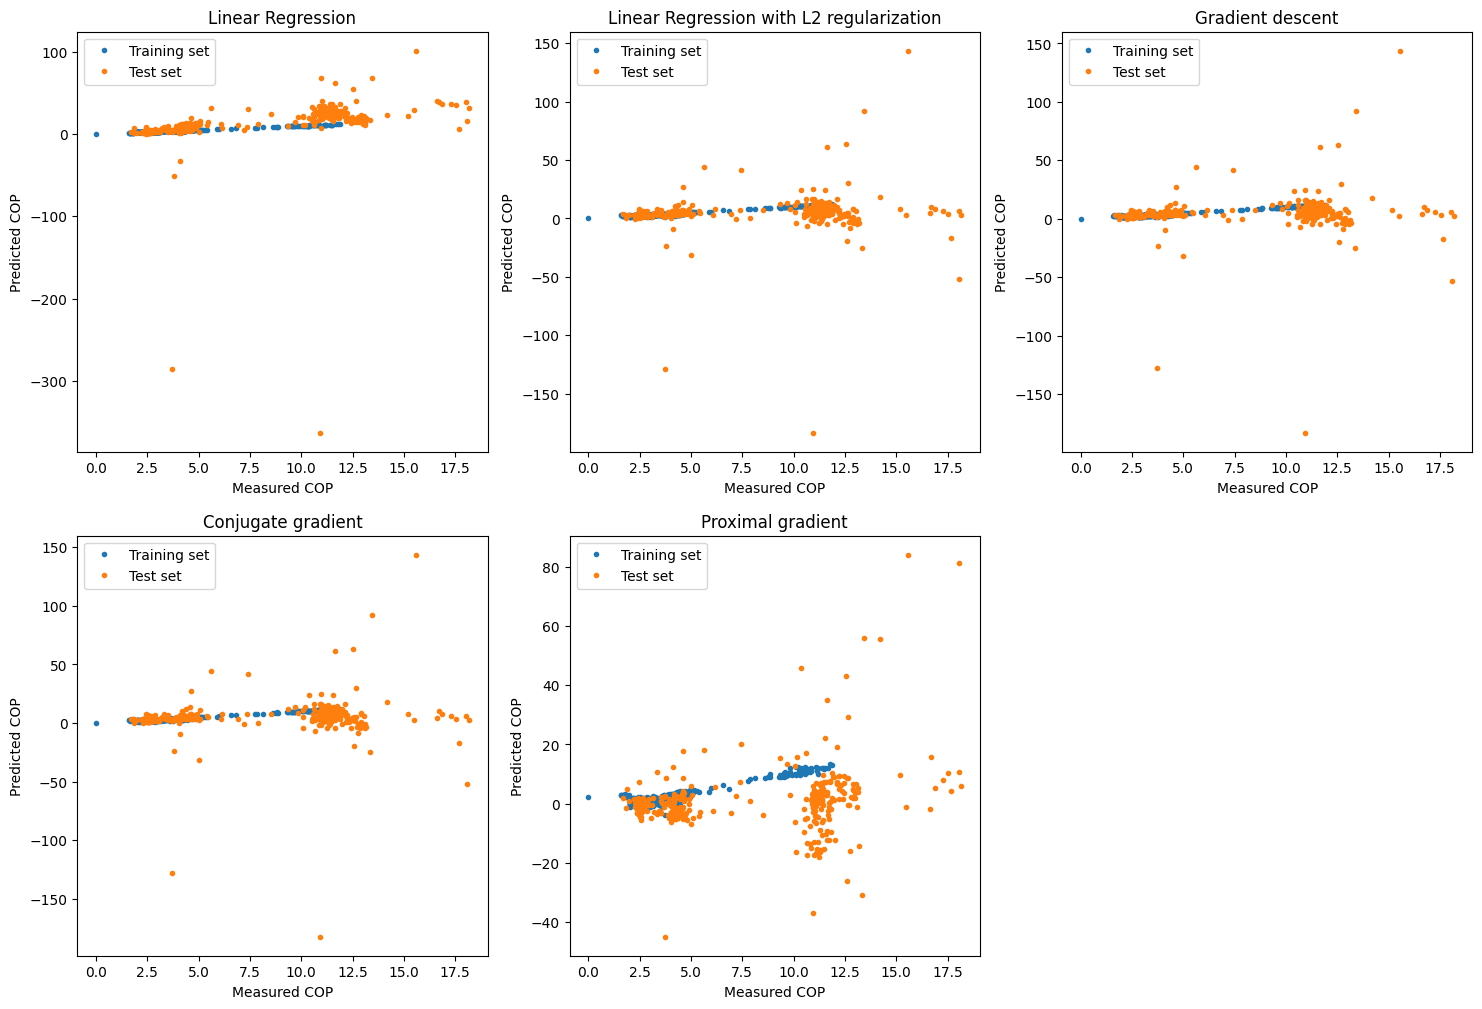

In [93]:
# Plotting the results in a 2x3 grid
plt.figure(figsize=(18,12))
plt.subplot(231)
plt.plot(b, A.dot(x), '.')
plt.plot(b_test, A_test.dot(x), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression')
plt.legend(['Training set', 'Test set'])

plt.subplot(232)
plt.plot(b, A.dot(x_reg), '.')
plt.plot(b_test, A_test.dot(x_reg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression with L2 regularization')
plt.legend(['Training set', 'Test set'])

plt.subplot(233)
plt.plot(b, A.dot(x_gd), '.')
plt.plot(b_test, A_test.dot(x_gd), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Gradient descent')
plt.legend(['Training set', 'Test set'])

plt.subplot(234)
plt.plot(b, A.dot(x_cg), '.')
plt.plot(b_test, A_test.dot(x_cg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Conjugate gradient')
plt.legend(['Training set', 'Test set'])

plt.subplot(235)
plt.plot(b, A.dot(x_pg), '.')
plt.plot(b_test, A_test.dot(x_pg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Proximal gradient')
plt.legend(['Training set', 'Test set'])

plt.show()


## Question 4.3

We may try to accelerate the algorithm using line search. Compare the speed of the algorithm with fixed step size and with line search.

In [145]:
b_ = 10
a = 0.5

l = np.floor( np.log( (b_/a)*L ) / np.log(1/a) )

b_ * (a**l)

1.4901161193847656e-07

In [151]:
# Based on the previous code for proximal gradient, use line search to accelerate the convergence of the algorithm 

# Initial point
x0 = np.zeros(A.shape[1])

# While loop until (x_old - x_pg_ls) is less than tol

x_pg_ls = x0
steps_pg_ls = 0
lambda_ = 200 / L
mu = 1

b_ = 10
a = 0.5

l = np.floor( np.log( (b_/a)*L ) / np.log(1/a) )

gamma = b_ * (a**l)

grad_fx = A.T.dot(A.dot(x0) - b) + lambda_*x0

tol = 1e-3
x_old = 1000 * np.ones(A.shape[1])

while np.linalg.norm(x_old - x_pg_ls) > tol:
    # print(gamma)
    x_old = x_pg_ls
    x_pg_ls = x_pg_ls - gamma * grad_fx
    x_pg_ls = soft_threshold(x_pg_ls, gamma * lambda_)
    grad_fx = A.T.dot(A.dot(x_pg_ls) - b) + lambda_*x_pg_ls
    b_ = 2*gamma
    l = np.floor( np.log( (b_/a)*L ) / np.log(1/a) )
    gamma = b_ * (a**l)
    steps_pg_ls += 1
    print(steps_pg_ls, np.linalg.norm(x_old - x_pg_ls, ord=2))

1 0.018019615134353725
2 0.010214063092246973
3 0.006492625179453805
4 0.004615859649269986
5 0.0035700595844950916
6 0.002929999626071352
7 0.0025163684025465228
8 0.002243003125556748
9 0.002060447612649227
10 0.001936958207442157
11 0.0018515672025180567
12 0.001790597251872273
13 0.0017453104186813135
14 0.0017102087122993774
15 0.0016818535534507835
16 0.0016580880146636581
17 0.0016375444992827461
18 0.0016193407994406642
19 0.0016028948701221225
20 0.0015878124357316243
21 0.0015738186055875745
22 0.0015607159538353196
23 0.001548358502085081
24 0.0015366353093605716
25 0.0015254599487913379
26 0.0015147635914131432
27 0.0015044903704326772
28 0.0014945941938140919
29 0.0014850365000489193
30 0.0014757846464079198
31 0.0014668107179296888
32 0.0014580906365470683
33 0.0014496034768720666
34 0.0014413309350678077
35 0.0014332569102433357
36 0.0014253671652973076
37 0.0014176490568035384
38 0.0014100913094684325
39 0.001402683831721433
40 0.00139541756122177
41 0.00138828433314381

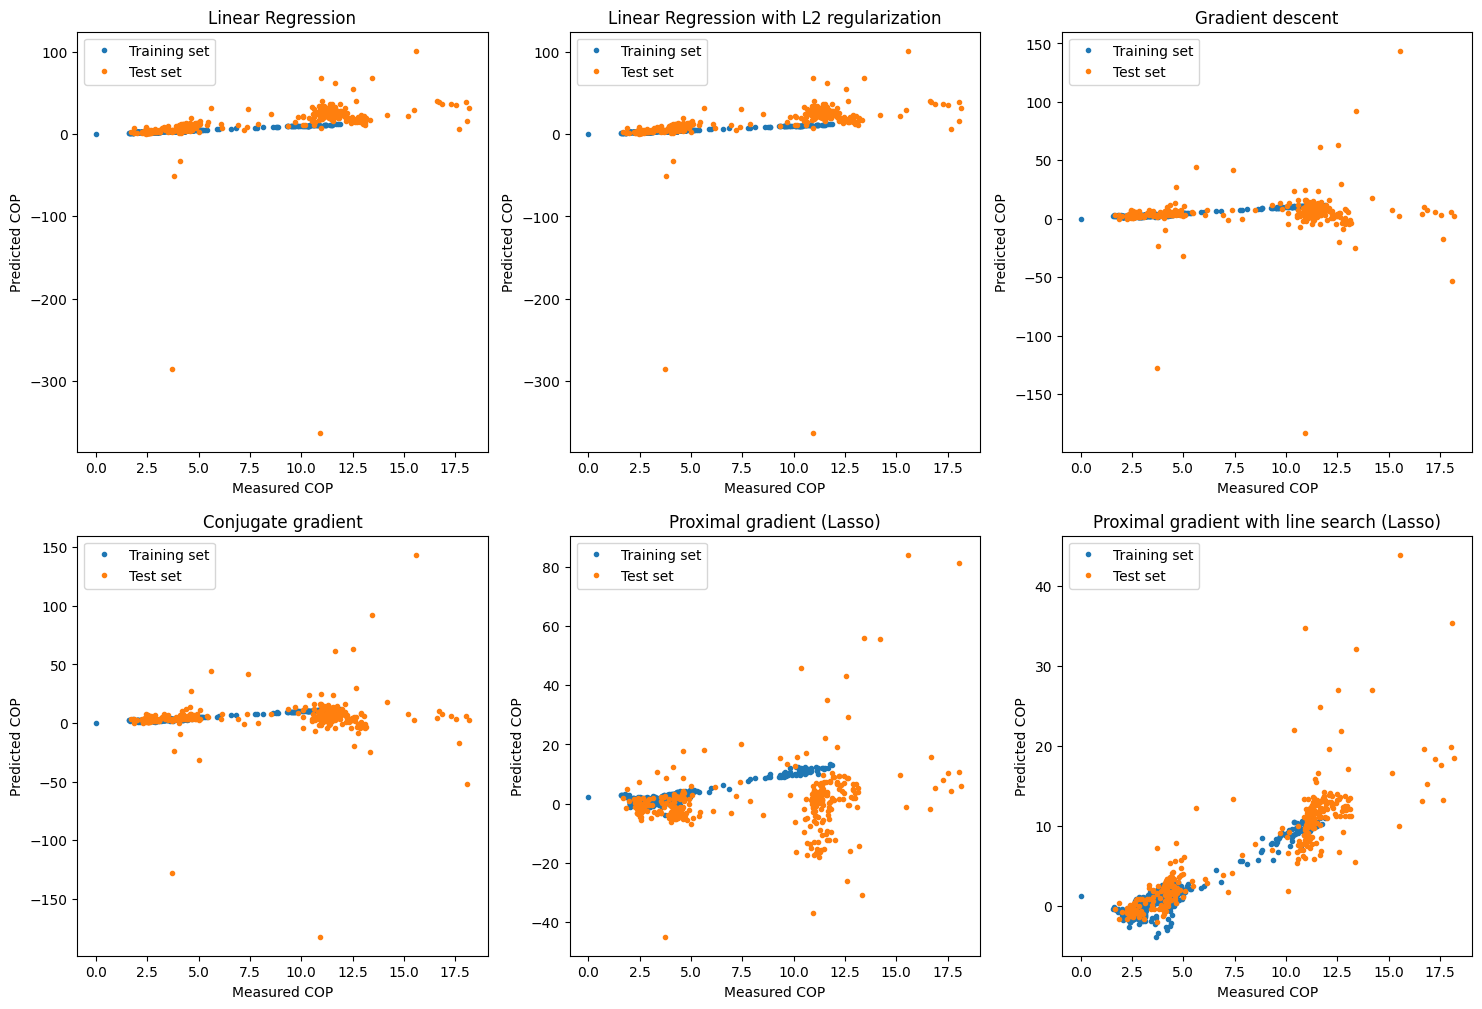

In [171]:
# Plotting the results in a 2x3 grid
plt.figure(figsize=(18,12))
plt.subplot(231)
plt.plot(b, A.dot(x), '.')
plt.plot(b_test, A_test.dot(x), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression')
plt.legend(['Training set', 'Test set'])

plt.subplot(232)
plt.plot(b, A.dot(x_reg), '.')
plt.plot(b_test, A_test.dot(x_reg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Linear Regression with L2 regularization')
plt.legend(['Training set', 'Test set'])

plt.subplot(233)
plt.plot(b, A.dot(x_gd), '.')
plt.plot(b_test, A_test.dot(x_gd), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Gradient descent')
plt.legend(['Training set', 'Test set'])

plt.subplot(234)
plt.plot(b, A.dot(x_cg), '.')
plt.plot(b_test, A_test.dot(x_cg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Conjugate gradient')
plt.legend(['Training set', 'Test set'])

plt.subplot(235)
plt.plot(b, A.dot(x_pg), '.')
plt.plot(b_test, A_test.dot(x_pg), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Proximal gradient (Lasso)')
plt.legend(['Training set', 'Test set'])

plt.subplot(236)
plt.plot(b, A.dot(x_pg_ls), '.')
plt.plot(b_test, A_test.dot(x_pg_ls), '.')
plt.xlabel('Measured COP')
plt.ylabel('Predicted COP')
plt.title('Proximal gradient with line search (Lasso)')
plt.legend(['Training set', 'Test set'])

plt.show()

The algorithm with line search does a third of iterations before reaching tolerance and having a model with the results being less scattered, while the algorithm without line search does more iterations and has a better adequate response. 

# Choice of the regularization parameter

You may not have time to code this part of the computer lab but it may be worth understanding what can be done in order to choose the regularization parameter.

A natural question when considering a regularized machine learning problem is: what is the best value for the regularization parameter $ \rho $? Its goal is to force the model to choose less complex solutions in order to generalize better.

Hence, to evaluate the generalization performance, we are going to split our data into a training set $ X_{\text{train}}, y_{\text{train}} $ and a validation set $ X_{\text{valid}}, y_{\text{valid}} $. Then, we solve the regression problem using the training set but test its performance on the validation set. Note that the loss function for the validation set is not necessarily the mean square error (but we will keep it as the mean square error here).

Gathering everything the problem we are trying to solve is the following bilevel optimization problem:

$$
\max_{\rho \geq 0} \frac{1}{n_{\text{valid}}} \sum_{j=1}^{n_{\text{valid}}} f(w, x_j, y_j)
$$

$$
\hat{w}(\rho) \in \arg \min \frac{1}{n_{\text{train}}} \sum_{i=1}^{n_{\text{train}}} f(w, x_i, y_i) + \rho R(w)
$$

where $ f(w, x_i, y_i) = \frac{1}{2} \| Aw - b \|_2^2 $ and $ R(w) $ is either $ R(w) = \frac{1}{2} \| w \|_2^2 $ or $ R(w) = \| w \|_1 $.

Since this is a complex nonconvex optimization problem, we are going to evaluate the accuracy on a grid of values for $ \rho $, that is $ \rho \in \{ \rho_0 a^k : k \in \{0, 1, \ldots, K\} \} $ for given $ \rho_0 > 0 $, $ 0 < a < 1 $ and $ K $. Then, we select the parameter $ \hat{w}(\rho) $ that has the smallest 0-1 loss on the validation set.

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.324e+00, tolerance: 3.127e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+00, tolerance: 3.127e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

The best value of rho is: 0.625
The corresponding validation error is: 0.6142299026194221


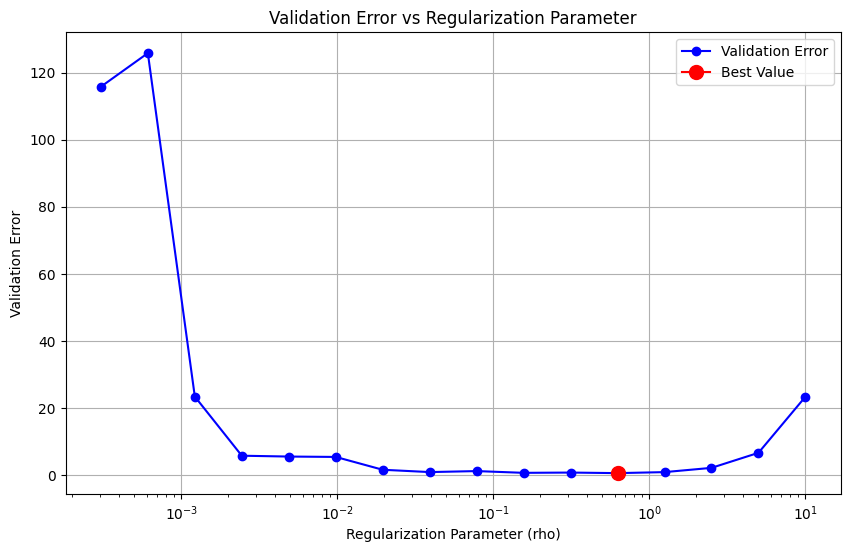

In [169]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Setting up the bilevel optimization problem

# Initialize the parameters for the grid search
rho_0 = 10      # Initial value of the regularization parameter
a = 0.5          # Factor to decrease rho in each iteration (must be between 0 and 1)
K = 15           # Number of values to try for rho

# Initialize lists to store rho values and corresponding errors
rhos = []
errors = []

# Loop over the grid of values for rho
for k in range(K + 1):
    rho = rho_0 * (a ** k)  # Compute the current rho value
    rhos.append(rho)  # Store the rho value
    
    # Train the Lasso model with the current rho value
    model = Lasso(alpha=rho)
    model.fit(A, b)
    
    # Compute the predictions on the validation set
    b_pred = model.predict(A_test)
    
    # Calculate the 0-1 loss (mean squared error in this case) for the validation set
    error = mean_squared_error(b_test, b_pred)
    errors.append(error)  # Store the error
    
    # Update the best_rho if the current model performs better
    if error < best_error:
        best_error = error
        best_rho = rho

# Print the best value of rho and its corresponding validation error
print(f"The best value of rho is: {best_rho}")
print(f"The corresponding validation error is: {best_error}")

# Train a final model using the best rho value
final_model = Lasso(alpha=best_rho)
final_model.fit(A, b)

# Plot the rho values against their corresponding errors
plt.figure(figsize=(10, 6))
plt.plot(rhos, errors, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # Since rho values can vary by orders of magnitude, a log scale can be helpful
plt.xlabel('Regularization Parameter (rho)')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Regularization Parameter (Lasso)')
plt.grid(True)

# Plot the best point rho, best_error in the same plot
plt.plot(best_rho, best_error, marker='o', markersize=10, color='red')
plt.legend(['Validation Error', 'Best Value'], loc='upper right')

plt.show()

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.324e+00, tolerance: 3.127e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+00, tolerance: 3.127e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

The best value of rho is: 0.625
The corresponding validation error is: 0.6142299026194221


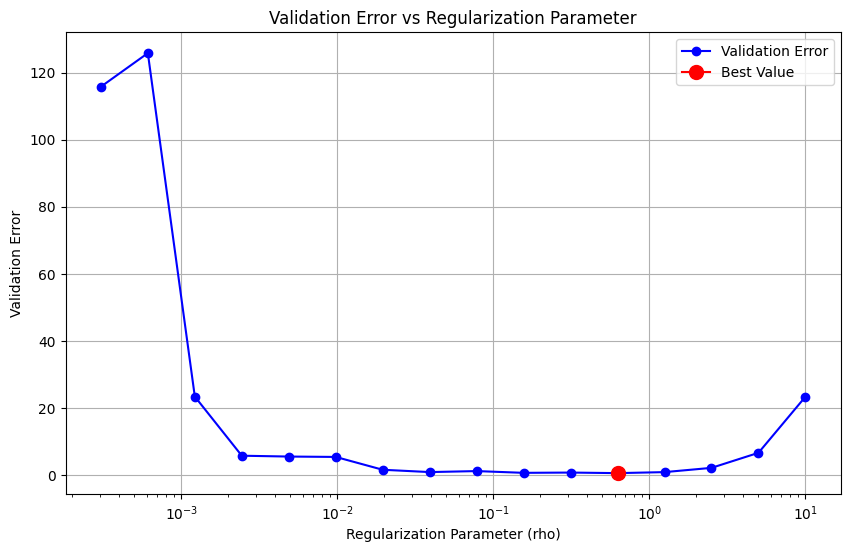

In [170]:
from sklearn.linear_model import Ridge

# Setting up the bilevel optimization problem

# Initialize the parameters for the grid search
rho_0 = 10      # Initial value of the regularization parameter
a = 0.5          # Factor to decrease rho in each iteration (must be between 0 and 1)
K = 15           # Number of values to try for rho

# Initialize lists to store rho values and corresponding errors
rhos = []
errors = []

# Loop over the grid of values for rho
for k in range(K + 1):
    rho = rho_0 * (a ** k)  # Compute the current rho value
    rhos.append(rho)  # Store the rho value
    
    # Train the Lasso model with the current rho value
    model = Lasso(alpha=rho)
    model.fit(A, b)
    
    # Compute the predictions on the validation set
    b_pred = model.predict(A_test)
    
    # Calculate the 0-1 loss (mean squared error in this case) for the validation set
    error = mean_squared_error(b_test, b_pred)
    errors.append(error)  # Store the error
    
    # Update the best_rho if the current model performs better
    if error < best_error:
        best_error = error
        best_rho = rho

# Print the best value of rho and its corresponding validation error
print(f"The best value of rho is: {best_rho}")
print(f"The corresponding validation error is: {best_error}")

# Train a final model using the best rho value
final_model = Ridge(alpha=best_rho)
final_model.fit(A, b)

# Plot the rho values against their corresponding errors
plt.figure(figsize=(10, 6))
plt.plot(rhos, errors, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # Since rho values can vary by orders of magnitude, a log scale can be helpful
plt.xlabel('Regularization Parameter (rho)')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Regularization Parameter (Ridge)')
plt.grid(True)

# Plot the best point rho, best_error in the same plot
plt.plot(best_rho, best_error, marker='o', markersize=10, color='red')
plt.legend(['Validation Error', 'Best Value'], loc='upper right')

plt.show()

# Comparison

## Question 6.1

Compare the solutions obtained by the two types of regularization.

1. *Linear Regression*: The predictions for the training set seem to be overfitted, as indicated by the relatively scattered distribution of test set predictions. The model seems to have high variance, performing well on the training data but poorly on the test data.

2. *Linear Regression with L2 Regularization*: Here, the L2 regularization (Ridge regression) seems to have improved the model's generalization as the test set predictions are less scattered and more in line with the training set. This indicates a reduction in overfitting compared to the plain linear regression model.

3. *Gradient Descent*: This method is an optimization algorithm used to minimize the cost function in a model. The corresponding plot shows a pattern similar to the linear regression without regularization, suggesting that the model might still be overfitting.

4. *Conjugate Gradient*: This optimization technique is generally used to solve systems of linear equations that are symmetric and positive-definite. The plot shows a better fit than the basic gradient descent, with the test set predictions being less scattered.

5. *Proximal Gradient (Lasso)*: The Lasso regularization (L1) has been applied, which tends to produce sparse models. This plot shows a significantly better fit for the test set compared to the previous models, indicating that Lasso regularization has likely improved the model's ability to generalize.

6. *Proximal Gradient with Line Search (Lasso)*: This approach combines Lasso regularization with a line search method to find the optimal step size for gradient descent. This seems to be the best model among all presented, with the test set predictions closely following the training set, suggesting a high level of model generalization and a reduction in overfitting.

In summary, the last two plots, which represent Lasso regularization with and without line search, show better generalization to the test set compared to the non-regularized models and the one with L2 regularization. The use of L1 regularization (Lasso) in these models appears to mitigate overfitting more effectively, leading to improved prediction accuracy on unseen data. The line search further enhances this effect by optimizing the step size in the gradient descent, as evidenced by the last plot's close alignment between training and test predictions.